<a href="https://colab.research.google.com/github/gyuwonchoi/PytorchTutorial/blob/main/DatasetNLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset :  샘플과 label 저장
### Dataloader: Dataset 샘플에 접근할 수 있도록 iterable 가능한 객채로 wrap


In [2]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
training_data= datasets.FashionMNIST(
    root='data',
    train = True,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

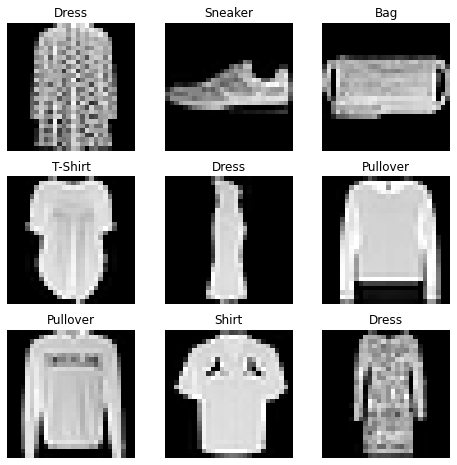

In [16]:
labels_map={
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure=plt.figure(figsize=(8,8))
cols,rows=3,3

for i in range(1, rows*cols+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item() # low=0, high, size,
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i) #rows, cols are # of figure 
 
  plt.title(labels_map[label])
  plt.axis("off") # for each subplot: returns each axis
  plt.imshow(img.squeeze(), cmap="gray")

plt.show()


#### 사용자 정의 데이터셋 Dataset 클래스는 반드시 다음의 3개 함수를 구현해야 함.

1. _"_init.__
2. "_len.__
3. "_getitem.__

In [18]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels=pd.read.csv(annotations_file, names=['file_name', 'label'])
    self.img_dir=img_dir
    self.transform=transform
    self.target_transform= target_transform

  def __len__(self):
    return len(self.imag_labels)

  def __getitem__(self, idx):
    img_path=os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # load the (idx, 0): img path
    image= read_image(img_path) # from torchvision: convert to tensor
    label= self.img_labels.iloc[idx,1] # load the (idx, 1): data label 

    if self.transforms:
        image= self.transform(image)
    if self.target_transform:
        label=self.target_transform(label)
    
    sample={"image":image, "label": label}

    return image, label

### Dataloader

Dataset은 feature를 로드하고 labeling함. 샘플들을 미니배치로 전달하고 매 epoch마다 데이터를 shuffle 하여 overfitting을 방지함: 이걸 해주는 API가 Dataloader임

In [19]:
from torch.utils.data import DataLoader

train_dataloader=DataLoader(training_data, batch_size=64, shuffle=True) 
test_dataloader=DataLoader(test_data, batch_size=62, shuffle=True)

### DataLoader로 iterate 하기

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


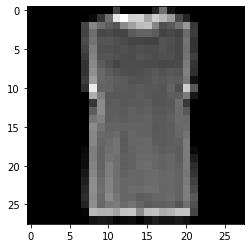

In [21]:
# iteration: returns bath with feature and label

train_features, train_labels=next(iter(train_dataloader)) # feature, labels
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img=train_features[0].squeeze()
label=train_labels[0]

plt.imshow(img, cmap='gray')
plt.show()